In [61]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [62]:
customer_churn = pd.read_csv('files_for_lab/customer_churn.csv')
display(customer_churn.head())
customer_churn.Churn.value_counts(dropna=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:>

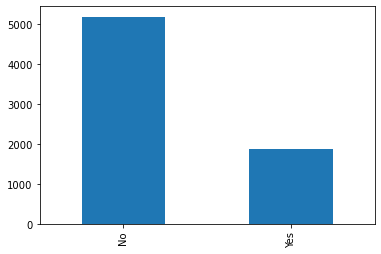

In [63]:
count_classes = customer_churn['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [64]:
customer_churn = customer_churn[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]


In [65]:
customer_churn.SeniorCitizen.value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [66]:
# SeniorCitizen only has 0 and 1 values -> It will be treated as categorical
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].astype('object')
customer_churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [67]:
# Looking for NaN
display(customer_churn.isna().sum())

display(customer_churn.dtypes)

tenure            0
SeniorCitizen     0
MonthlyCharges    0
Churn             0
dtype: int64

tenure              int64
SeniorCitizen      object
MonthlyCharges    float64
Churn              object
dtype: object

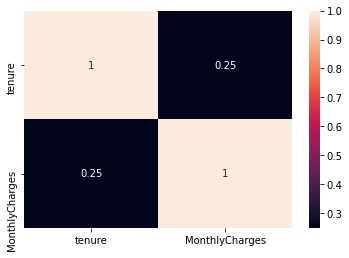

In [68]:
# X/y split
X = customer_churn.drop('Churn',axis = 1)
y = customer_churn['Churn']
sns.heatmap(X.corr(), annot=True)
plt.show()

In [69]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [70]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [71]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [81]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [82]:
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [83]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [85]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test, pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred, pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.47701149425287354
recall:  0.7170626349892009
f1:  0.5729076790336497
